<a href="https://colab.research.google.com/github/marce3-2140/Data-Analysis-with-Panda/blob/main/RecreateGraphMortgages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Nombre del Data Frame: Recreate Interest vs Principal Graph
    
</center>

## Tarea
El conjunto de datos que se les entregó aquí es el conjunto de datos de la hipoteca que se usó previamente en este curso. La meta es reproducir el gráfico. El trazado negro es la hipoteca de 30 años en un 5 % y la línea azul es la hipoteca de 30 años en un 3 %. Lo que está graficado es el pago de interés acumulado por sobre el curso del préstamo. Observen que no es el mejor gráfico. No dice qué línea para qué hipoteca, y el gráfico en sí no es el más atractivo visualmente, pero es un gran comienzo para la visualización de sus datos.

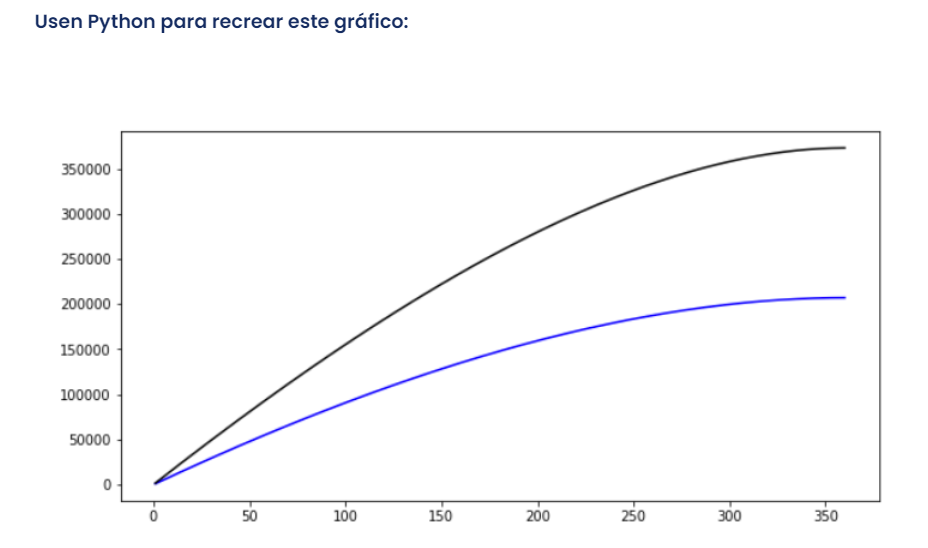

In [7]:
# mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd

The dataset used in this section are for 4 different mortgages. A mortgage can be either 30 year or 15 year and have different interest rates. Later in the course, you will have to look at data documentation and explore data on your own before you do something with it. The goal of this section is to show you how to filter out data for later analysis.

In [9]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Fundamentals/Cargas/mortgages.csv')
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [19]:
df.shape

(1080, 8)

### Filter data and solution

1. Creen un filtro para que el nombre de la hipoteca sea de "30 años".Usen len() para encontrar cuántas filas corresponden a 30 años.

 2. Creen un filtro para una tasa de interes del 3% (observen como esta escrito en los datos.

 3. Definan el nuevo data frame basandodese en los filtros de year e interes que han creado.

In [36]:
mortgageFilter = df['Mortgage Name'] == '30 Year'
mortgageFilter.sum()

720

In [37]:
#Tambien encontramos el numero de filas usando len() aunque es mas largo.
otherfiles = len(df) - (mortgageFilter.sum())
mortgagefiles = len(df) - otherfiles
mortgagefiles

720

se uso len() para encontrar cuántas filas corresponden a 30 años y encontramos 720 filas.

In [39]:
#Creamos el filtro del interes al 3%
interestFilter = df['Interest Rate'] == 0.03

4. Tenemos una opción para el 5 % de tasa de interés:

   Podemos crear otro filtro donde df.['Interest Rate'] == .05

   Tambien, podemos usar el símbolo de negación (~) con nuestro filtro actual para darnos todo EXCEPTO lo que hemos definido en ese filtro. Esto funciona porque solo tenemos dos tasas de interés (cualquier valor que NO es 3 % es 5 %).

In [41]:
#Creamos el filtro para el interes al 5%
interestFilter05 = df['Interest Rate'] == 0.05
interestFilter05.sum()

540

In [44]:
mortgage30_05 = df.loc[mortgageFilter & ~interestFilter,: ]
mortgage30_03 = df.loc[mortgageFilter & interestFilter,: ]

5. Puesto que queremos graficar la suma acumulativa del interés pagado, podemos
   usar la función .cumsum().   ¿Cuáles son los tres primeros valores en la salida para la suma acumulativa de la tasa del 3 %?

In [48]:
#Los primeros 3 de interes al 5%
mortgage30_05['Interest Paid'].cumsum().head(3)

360    1666.66
361    3331.32
362    4993.97
Name: Interest Paid, dtype: float64

In [49]:
#Los primeros 3 de interes al 3%
mortgage30_03['Interest Paid'].cumsum().head(3)

0    1000.00
1    1998.28
2    2994.84
Name: Interest Paid, dtype: float64

Los tres primeros valores de la funcion cumsum() son: 1000.00, 1998.28, 2994.84

6. Usen plt.plot(x, y, c=color) para trazar la línea negra (5 %).  Queremos los valores x para que sean ['Month'] y los valores y para que sean la suma acumulativa del Interest Paid (interés pagado).  Podemos usar el código de la pregunta anterior para definir los valores y dentro de la función plt.plot().  Pista: para el negro, c = 'k'

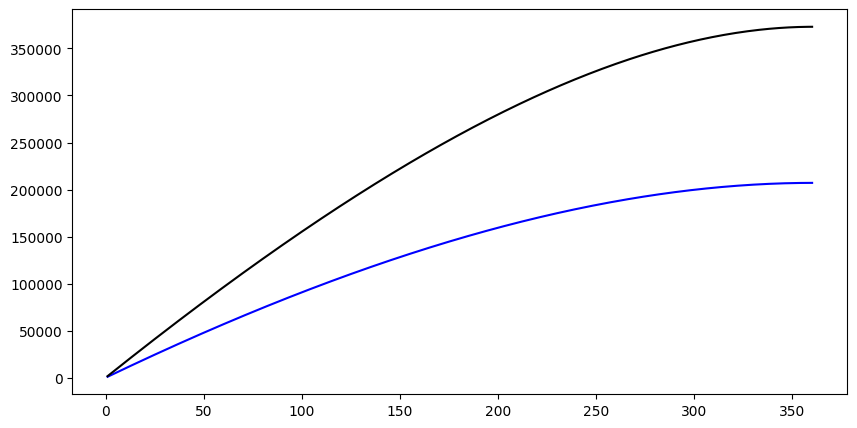

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(mortgage30_03['Month'], mortgage30_03['Interest Paid'].cumsum(), c = 'b');
axes.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k');

Se realiza la grafica de color negro para el interes al 5% como lo pide el ejercicio y se hace en comparacion con el interes al 3% linea de color azul.

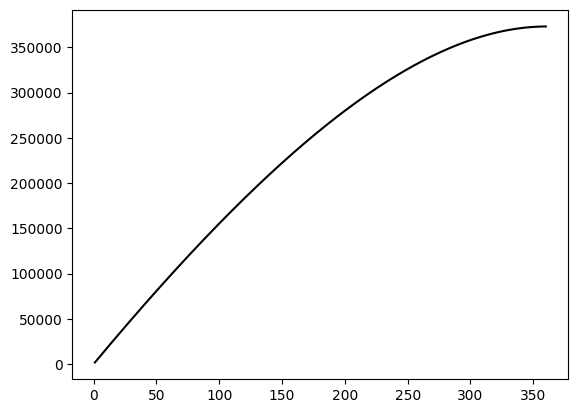

In [51]:
plt.plot(mortgage30_05['Month'], mortgage30_05['Interest Paid'].cumsum(), c = 'k')
